In [1]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchmetrics import Accuracy

## Load data

In [2]:
X_array, y_array = make_blobs(n_samples=1000,
                              n_features=2,
                              centers=4,
                              cluster_std=2,
                              random_state=42)
print(X_array.shape)
print(y_array.shape)

(1000, 2)
(1000,)


## Transform array to tensor

In [3]:
X = torch.from_numpy(X_array).type(torch.float)
y = torch.from_numpy(y_array).type(torch.float)

## Visualize data

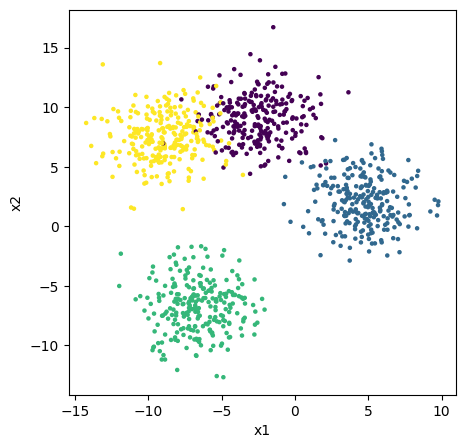

In [4]:
x1 = X[:, 0]
x2 = X[:, 1]

plt.figure(figsize=(5,5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1, x2, s=5, c=y)

## Train/Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2)
y_train = y_train.type(torch.long)
y_test = y_test.type(torch.long)
print(len(X_train))
print(len(X_test))

800
200


## Build model

In [6]:
class MulticlassClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=2,
                      out_features=10),
            nn.Linear(in_features=10,
                      out_features=4)
        )

    def forward(self, X: torch.Tensor):
        return self.linear_layer(X)

In [7]:
model =MulticlassClassificationModel()

## Train/Evaluation function

In [8]:
torch.manual_seed(42)

def train_model(model :nn.Module,
                train_data :torch.Tensor,
                train_label :torch.Tensor,
                loss_function :nn.functional,
                accuracy_function :nn.functional,
                optimizer :torch.optim):
    model.train()
    train_logits = model(train_data)
    train_loss = loss_function(train_logits, train_label)
    train_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)
    train_acc = accuracy_function(train_pred, train_label)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    return train_loss, train_acc

def eval_model(model :nn.Module,
               test_data :torch.Tensor,
               test_label :torch.Tensor,
               loss_function :nn.functional,
               accuracy_function :nn.functional):
    model.eval()
    with torch.inference_mode():
        test_logits = model(test_data)
        test_loss = loss_function(test_logits, test_label)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_acc = accuracy_function(test_pred, test_label)
        return test_loss, test_acc

## Train/Evaluation loop

In [9]:
# define loss function
loss_fn = nn.CrossEntropyLoss()

# define optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

# define accuracy function
acc_fn = Accuracy(task='multiclass',
                  num_classes=4)

torch.manual_seed(42)
epochs = 10
epoch_values = []
train__loss_values = []
test_loss_values = []

for epoch in tqdm(range(epochs)):
    train__loss, train__acc = train_model(model,
                                          X_train,
                                          y_train,
                                          loss_fn,
                                          acc_fn,
                                          optimizer)
    test__loss, test__acc = eval_model(model,
                                       X_test,
                                       y_test,
                                       loss_fn,
                                       acc_fn)
    
    if epochs >= 1000:
        if epoch%100==0:
            print(f"Epoch : {epoch} | Train_loss : {train__loss :.3f} | Train_acc : {train__acc :.2f}% | Test_loss : {test__loss :.3f} | Test_acc : {test__acc :.2f}%")
            epoch_values.append(epoch)
            train__loss_values.append(train__loss)
            test_loss_values.append(test__loss)
    elif epochs >= 100:
        if epoch%10==0:
            print(f"Epoch : {epoch} | Train_loss : {train__loss :.3f} | Train_acc : {train__acc :.2f}% | Test_loss : {test__loss :.3f} | Test_acc : {test__acc :.2f}%")
            epoch_values.append(epoch)
            train__loss_values.append(train__loss)
            test_loss_values.append(test__loss)
    elif epochs > 10:
        if epoch%2==0:
            print(f"Epoch : {epoch} | Train_loss : {train__loss :.3f} | Train_acc : {train__acc :.2f}% | Test_loss : {test__loss :.3f} | Test_acc : {test__acc :.2f}%")
            epoch_values.append(epoch)
            train__loss_values.append(train__loss)
            test_loss_values.append(test__loss)
    else:
        print(f"Epoch : {epoch} | Train_loss : {train__loss :.3f} | Train_acc : {train__acc :.2f}% | Test_loss : {test__loss :.3f} | Test_acc : {test__acc :.2f}%")
        epoch_values.append(epoch)
        train__loss_values.append(train__loss)
        test_loss_values.append(test__loss)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 146.86it/s]

Epoch : 0 | Train_loss : 1.106 | Train_acc : 0.59% | Test_loss : 0.936 | Test_acc : 0.58%
Epoch : 1 | Train_loss : 0.924 | Train_acc : 0.61% | Test_loss : 0.845 | Test_acc : 0.59%
Epoch : 2 | Train_loss : 0.829 | Train_acc : 0.62% | Test_loss : 0.795 | Test_acc : 0.62%
Epoch : 3 | Train_loss : 0.779 | Train_acc : 0.62% | Test_loss : 0.755 | Test_acc : 0.63%
Epoch : 4 | Train_loss : 0.740 | Train_acc : 0.63% | Test_loss : 0.721 | Test_acc : 0.63%
Epoch : 5 | Train_loss : 0.707 | Train_acc : 0.64% | Test_loss : 0.691 | Test_acc : 0.64%
Epoch : 6 | Train_loss : 0.678 | Train_acc : 0.65% | Test_loss : 0.665 | Test_acc : 0.68%
Epoch : 7 | Train_loss : 0.652 | Train_acc : 0.66% | Test_loss : 0.641 | Test_acc : 0.72%
Epoch : 8 | Train_loss : 0.629 | Train_acc : 0.70% | Test_loss : 0.620 | Test_acc : 0.75%
Epoch : 9 | Train_loss : 0.608 | Train_acc : 0.73% | Test_loss : 0.601 | Test_acc : 0.76%


## Train/Test loss vs Epochs

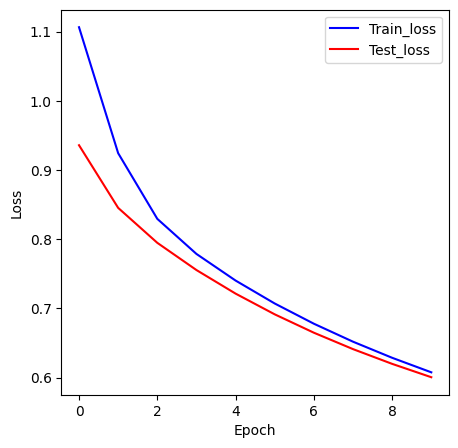

In [10]:
with torch.inference_mode():
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(epoch_values, train__loss_values, c='b', label='Train_loss')
    plt.plot(epoch_values, test_loss_values, c='r', label='Test_loss')
    plt.legend()

## Make prediction

In [12]:
def make_prediction(model :nn.Module,
                    data :torch.Tensor):
    if data.shape==torch.Size([2]):
        data = data.reshape(1,2)
        
    with torch.inference_mode():
        logit = model(data)
        pred = torch.softmax(logit, dim=1).argmax(dim=1)
        return pred


make_prediction(model=model,
                data=X_train[:10])

tensor([1, 0, 2, 2, 3, 1, 2, 0, 3, 2])

In [13]:
torch.save(obj=model,
           f='/Users/navalmor/Desktop/PyTorch_Learning/classification/models/MulticlassClassificationModel.pt')